'''
==========================================================================================
MILESTONE 1

Nama  : Yosef Feriyanto

Batch : HCK-007

Program analisa ini dibuat untuk menyusun strategi bisnis dari data penjualan selama 3 bulan dari 3 cabang pusat perbelanjaan Supercenter
===========================================================================================
'''

url dataset: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales?datasetId=205965&sortBy=voteCount

url tableau: https://public.tableau.com/views/Milestone_1_Yosef_Feriyanto/DashboardHasilAnalisa?:language=en-US&:display_count=n&:origin=viz_share_link

# INDENTIFIKASI MASALAH

## Topik Permasalahan

Saya sebagai Data Analyst ditunjuk untuk menyusun perencanaan bisnis Supercenter dari data yang ada agar bisa menganalisa apa yang sudah terjadi dan bisa memperbaiki penjualan Supercenter.

## Latar Belakang

Supercenter merupakan pusat perbelanjaan (mall) yang ada di 3 kota di Myanmar yaitu Yangon, Naypyitaw, & Mandalay dan data yang terkumpul dalam data frame ini merupakan data penjualan dari 1 Januari 2019 s.d. 30 Maret 2019 yang akan digunakan selanjutnya untuk menganalisa beberapa permasalahan untuk menyusun strategi Supercenter kedepannya.

## Problem Statement

Mengetahui wawasan tentang perilaku konsumen, tren penjualan, dan metrik keuntungan dari data penjualan di tiga cabang Supercenter selama 1 Januari s.d 30 Maret 2019.

## Penjabaran Masalah

1. Cabang mana yang memeroleh pendapatan tertinggi (Desc. Stat.)
2. Bagaimana demografi belanja di Supercenter menurut jenis kelamin (Inf. Stat.)
3. Jenis pembayaran paling efisien (Inf. Stat.)
4. Kapan waktu yang paling ramai berbelanja (Vis.)
5. Popularitas berbagai lini produk pada setiap cabang (Vis.)
6. Bagaimana perilaku belanja member dibandingkan dengan non-member (Vis.)
7. Bagaimana tren penjualan di berbagai cabang/kota (Vis.)

# DATA LOADING

**Import Data Frame**

In [30]:
import pandas as pd

df = pd.read_csv(r"C:\Users\omen\Hacktiv8\Classroom\supercenter_sales.csv")

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


**Menunjukan informasi umum data frame**

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Semua tipe datanya terlihat sudah sesuai

**Pengecekan missing value pada setiap kolom**

In [32]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Tidak ada missing value sama sekali

**Pengecekan jumlah unique value pada setiap kolom**

In [33]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

# DATA CLEANING

**Drop kolom 'gross margin percentage' & 'Branch'**

Kolom 'Branch' dihapus karena data tidak memerlukan Foreign Key untuk kolom 'City' dan tiga unique value di dalam kolom 'City' sudah bisa mewakili dirinya sendiri.

Kolom 'gross margin percentage' jika diperhatikan, memberi nilai yang salah. Dalam data ini, Supercenter selalu mengambil laba 5% (Tax 5%) dari 'Unit Price' dikali 'QUantity' yang artinya 'Gross Income' Supercenter selalu sama dengan 'Tax 5%' dan berarti seharusnya nilai di dalam 'gross margin percentage' adalah 5 % juga, tapi dihapus karena datanya hanya memiliki satu variasi dan tidak diperlukan.

In [34]:
col_to_drop = ['gross margin percentage', 'Branch']

df2 = df.drop(columns=col_to_drop)

df2.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3


**Rename kolom agar lebih rapih**

In [35]:
df2.rename(columns={'Customer type':'Customer Type', 'Product line':'Product Line', 'Unit price':'Unit Price', 'Total':'Total Payment', 'Payment':'Payment Type', 'cogs':'COGS', 'gross income':'Gross Income'}, inplace=True)

df2.head()

,Invoice ID,City,Customer Type,Gender,Product Line,Unit Price,Quantity,Tax 5%,Total Payment,Date,Time,Payment Type,COGS,Gross Income,Rating
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3


# ANALISIS & PERHITUNGAN

## (1/7) Analisa cabang mana yang memeroleh pendapatan tertinggi (Descriptive Statistic)

### Sebelum outlier dibersihkan

In [36]:
import pandas as pd

#Untuk mendapat nilai modus karena tidak bisa dipanggil langsung
def get_mode(series):
    modes = series.mode()
    if modes.empty:
        return None
    return modes.iloc[0]

#Variabel pemanggilan masing masing matriks
average_payment = df2[df2['City'].isin(['Yangon', 'Naypyitaw', 'Mandalay'])].groupby('City')['Total Payment'].mean()
median_payment = df2[df2['City'].isin(['Yangon', 'Naypyitaw', 'Mandalay'])].groupby('City')['Total Payment'].median()
mode_payment = df2[df2['City'].isin(['Yangon', 'Naypyitaw', 'Mandalay'])].groupby('City')['Total Payment'].apply(get_mode)
range_payment = df2[df2['City'].isin(['Yangon', 'Naypyitaw', 'Mandalay'])].groupby('City')['Total Payment'].apply(lambda x: x.max() - x.min())
dev_std_payment = df2[df2['City'].isin(['Yangon', 'Naypyitaw', 'Mandalay'])].groupby('City')['Total Payment'].std()
skew_payment = df2[df2['City'].isin(['Yangon', 'Naypyitaw', 'Mandalay'])].groupby('City')['Total Payment'].skew()
kurt_payment = df2[df2['City'].isin(['Yangon', 'Naypyitaw', 'Mandalay'])].groupby('City')['Total Payment'].apply(pd.DataFrame.kurt)

#### Matriks Dasar

In [37]:
print('Rerata Total Payment:\n', average_payment, '\n')
print('Median Total Payment:\n', median_payment, '\n')
print('Modus Total Payment:\n', mode_payment, '\n')

Rerata Total Payment:
 City
Mandalay     319.872506
Naypyitaw    337.099715
Yangon       312.354031
Name: Total Payment, dtype: float64 

Median Total Payment:
 City
Mandalay     252.88200
Naypyitaw    271.41975
Yangon       240.82800
Name: Total Payment, dtype: float64 

Modus Total Payment:
 City
Mandalay     263.970
Naypyitaw    829.080
Yangon       216.846
Name: Total Payment, dtype: float64 



#### Variabilitas Data

In [38]:
print('Range Total Payment:\n', range_payment, '\n')
print('Std Dev Total Payment:\n', dev_std_payment, '\n')

Range Total Payment:
 City
Mandalay     1003.8525
Naypyitaw    1031.9715
Yangon       1026.5955
Name: Total Payment, dtype: float64 

Std Dev Total Payment:
 City
Mandalay     242.447565
Naypyitaw    263.160870
Yangon       231.640025
Name: Total Payment, dtype: float64 



#### Persebaran Data

In [39]:
print('Skewness Total Payment:\n', skew_payment, '\n')
print('Kurtosis Total Payment:\n', kurt_payment, '\n')

Skewness Total Payment:
 City
Mandalay     0.888505
Naypyitaw    0.855874
Yangon       0.905500
Name: Total Payment, dtype: float64 

Kurtosis Total Payment:
 City
Mandalay    -0.158076
Naypyitaw   -0.177354
Yangon      -0.003526
Name: Total Payment, dtype: float64 



#### Visualisasi

Kota Yangon

City
Yangon    Axes(0.125,0.11;0.775x0.77)
Name: Total Payment, dtype: object

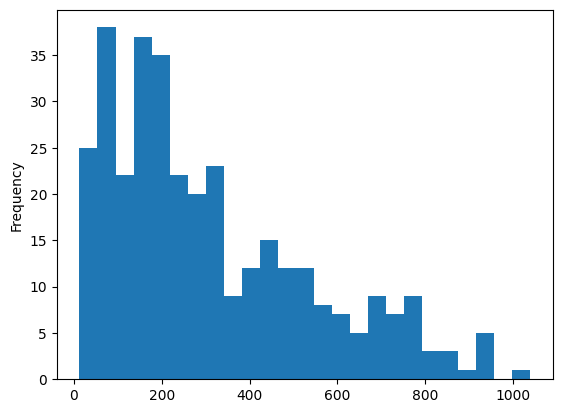

In [40]:
df2[df2['City'].isin(['Yangon'])].groupby('City')['Total Payment'].plot(kind='hist',bins=25)

Kota Naypyitaw

City
Naypyitaw    Axes(0.125,0.11;0.775x0.77)
Name: Total Payment, dtype: object

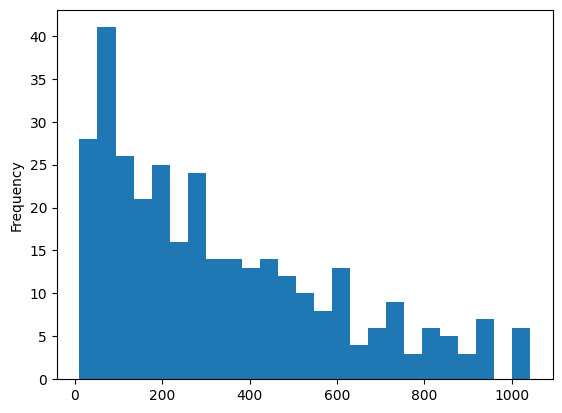

In [41]:
df2[df2['City'].isin(['Naypyitaw'])].groupby('City')['Total Payment'].plot(kind='hist',bins=25)

Kota Mandalay

City
Mandalay    Axes(0.125,0.11;0.775x0.77)
Name: Total Payment, dtype: object

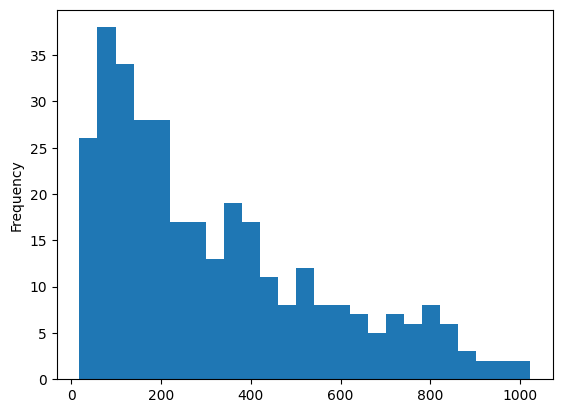

In [42]:
df2[df2['City'].isin(['Mandalay'])].groupby('City')['Total Payment'].plot(kind='hist',bins=25)

### Pembersihan outlier

#### Deteksi IQR

**Data outlier dan persentasiya**

Pembersihan outlier menggunakan **Tukey's Rule** (IQR) karena persebaran datanya tidak normal atau nilai skewness tidak mendekati nol dan skewness termasuk dalam moderately skewed.

In [43]:
def calculate_bounds(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return pd.Series({'lower_bound': lower_bound, 'upper_bound': upper_bound})

bounds = df2[df2['City'].isin(['Yangon', 'Naypyitaw', 'Mandalay'])].groupby('City')['Total Payment'].apply(calculate_bounds).unstack()

#Menyaring outliers
filtered = df2[df2['City'].isin(['Yangon', 'Naypyitaw', 'Mandalay'])]
outlier = filtered[((filtered['City'] == 'Yangon') & ((filtered['Total Payment'] < bounds.loc['Yangon', 'lower_bound']) | (filtered['Total Payment'] > bounds.loc['Yangon', 'upper_bound']))) |
                   ((filtered['City'] == 'Naypyitaw') & ((filtered['Total Payment'] < bounds.loc['Naypyitaw', 'lower_bound']) | (filtered['Total Payment'] > bounds.loc['Naypyitaw', 'upper_bound']))) |
                   ((filtered['City'] == 'Mandalay') & ((filtered['Total Payment'] < bounds.loc['Mandalay', 'lower_bound']) | (filtered['Total Payment'] > bounds.loc['Mandalay', 'upper_bound'])))]

print("Upper and Lower Boundaries for each city:")
for city in ['Yangon', 'Naypyitaw', 'Mandalay']:
    print(f"{city}:")
    print(f"  - Upper Boundary: {bounds.loc[city, 'upper_bound']:.2f}")
    print(f"  - Lower Boundary: {bounds.loc[city, 'lower_bound']:.2f}")
    print("")
    
print(outlier)
print('\n')
print(f"Percentage of outliers: {len(outlier)*100/len(filtered):.2f}%")


Upper and Lower Boundaries for each city:
Yangon:
  - Upper Boundary: 942.12
  - Lower Boundary: -345.29

Naypyitaw:
  - Upper Boundary: 1057.18
  - Lower Boundary: -439.95

Mandalay:
  - Upper Boundary: 984.06
  - Lower Boundary: -398.54

      Invoice ID      City Customer Type  Gender         Product Line  \
167  687-47-8271    Yangon        Normal    Male  Fashion accessories   
429  325-77-6186    Yangon        Member  Female   Home and lifestyle   
792  744-16-7898  Mandalay        Normal  Female   Home and lifestyle   
996  303-96-2227  Mandalay        Normal  Female   Home and lifestyle   

     Unit Price  Quantity  Tax 5%  Total Payment       Date   Time  \
167       98.98        10  49.490       1039.290   2/8/2019  16:20   
429       90.65        10  45.325        951.825   3/8/2019  10:53   
792       97.37        10  48.685       1022.385  1/15/2019  13:48   
996       97.38        10  48.690       1022.490   3/2/2019  17:16   

    Payment Type   COGS  Gross Income  Rati

Akan terbuang 4 data atau 0,4% dari seuruh data

#### Visualisasi boxplot

<Axes: >

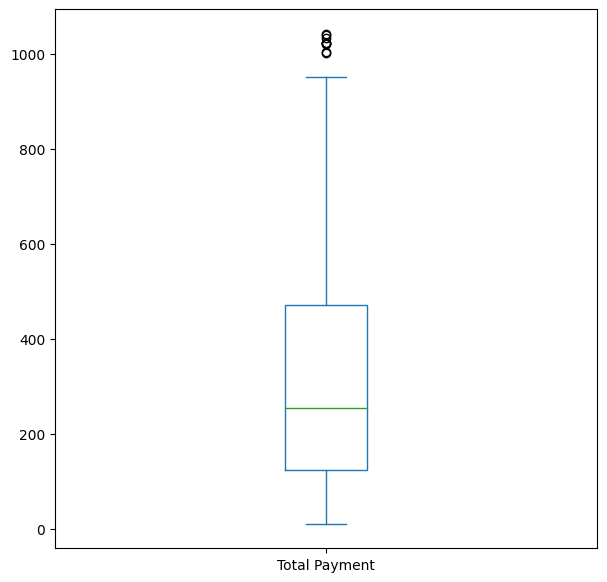

In [44]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,7))

df2['Total Payment'].plot(kind='box')

Semua outlier berada diatas upper boundaries

**Variabel dataframe baru yang sudah membuang outlier**

In [45]:
filtered = df2[df2['City'].isin(['Yangon', 'Naypyitaw', 'Mandalay'])]

outlier_condition = (
    ((filtered['City'] == 'Yangon') & ((filtered['Total Payment'] < bounds.loc['Yangon', 'lower_bound']) | (filtered['Total Payment'] > bounds.loc['Yangon', 'upper_bound']))) |
    ((filtered['City'] == 'Naypyitaw') & ((filtered['Total Payment'] < bounds.loc['Naypyitaw', 'lower_bound']) | (filtered['Total Payment'] > bounds.loc['Naypyitaw', 'upper_bound']))) |
    ((filtered['City'] == 'Mandalay') & ((filtered['Total Payment'] < bounds.loc['Mandalay', 'lower_bound']) | (filtered['Total Payment'] > bounds.loc['Mandalay', 'upper_bound'])))
)

df3 = filtered[~outlier_condition].copy()  #"~" merupakan operator negasi, untuk mengambil baris yang bukan outlier

print(df3)
print('\n')
print(f"Percentage of data kept after removing outliers: {len(df3)*100/len(filtered):.2f}%")

      Invoice ID       City Customer Type  Gender            Product Line  \
0    750-67-8428     Yangon        Member  Female       Health and beauty   
1    226-31-3081  Naypyitaw        Normal  Female  Electronic accessories   
2    631-41-3108     Yangon        Normal    Male      Home and lifestyle   
3    123-19-1176     Yangon        Member    Male       Health and beauty   
4    373-73-7910     Yangon        Normal    Male       Sports and travel   
..           ...        ...           ...     ...                     ...   
994  652-49-6720  Naypyitaw        Member  Female  Electronic accessories   
995  233-67-5758  Naypyitaw        Normal    Male       Health and beauty   
997  727-02-1313     Yangon        Member    Male      Food and beverages   
998  347-56-2442     Yangon        Normal    Male      Home and lifestyle   
999  849-09-3807     Yangon        Member  Female     Fashion accessories   

     Unit Price  Quantity   Tax 5%  Total Payment       Date   Time  \
0   

Tersisa 99,6% dari data total sebelumnya

### Setelah outlier dibersihkan

In [46]:
def get_mode(series):
    modes = series.mode()
    if modes.empty:
        return None
    return modes.iloc[0]

average_payment2 = df3[df3['City'].isin(['Yangon', 'Naypyitaw', 'Mandalay'])].groupby('City')['Total Payment'].mean()
median_payment2 = df3[df3['City'].isin(['Yangon', 'Naypyitaw', 'Mandalay'])].groupby('City')['Total Payment'].median()
mode_payment2 = df3[df3['City'].isin(['Yangon', 'Naypyitaw', 'Mandalay'])].groupby('City')['Total Payment'].apply(get_mode)
range_payment2 = df3[df3['City'].isin(['Yangon', 'Naypyitaw', 'Mandalay'])].groupby('City')['Total Payment'].apply(lambda x: x.max() - x.min())
dev_std_payment2 = df3[df3['City'].isin(['Yangon', 'Naypyitaw', 'Mandalay'])].groupby('City')['Total Payment'].std()
skew_payment2 = df3[df3['City'].isin(['Yangon', 'Naypyitaw', 'Mandalay'])].groupby('City')['Total Payment'].skew()
kurt_payment2 = df3[df3['City'].isin(['Yangon', 'Naypyitaw', 'Mandalay'])].groupby('City')['Total Payment'].apply(pd.DataFrame.kurt)

#### Matriks Dasar

In [47]:
print('Rerata Total Payment:\n', average_payment2, '\n')
print('Median Total Payment:\n', median_payment2, '\n')
print('Modus Total Payment:\n', mode_payment2, '\n')

Rerata Total Payment:
 City
Mandalay     315.614536
Naypyitaw    337.099715
Yangon       308.311407
Name: Total Payment, dtype: float64 

Median Total Payment:
 City
Mandalay     252.23625
Naypyitaw    271.41975
Yangon       237.15300
Name: Total Payment, dtype: float64 

Modus Total Payment:
 City
Mandalay     263.970
Naypyitaw    829.080
Yangon       216.846
Name: Total Payment, dtype: float64 



#### Variabilitas Data

In [48]:
print('Range Total Payment:\n', range_payment, '\n')
print('Std Dev Total Payment:\n', dev_std_payment, '\n')

Range Total Payment:
 City
Mandalay     1003.8525
Naypyitaw    1031.9715
Yangon       1026.5955
Name: Total Payment, dtype: float64 

Std Dev Total Payment:
 City
Mandalay     242.447565
Naypyitaw    263.160870
Yangon       231.640025
Name: Total Payment, dtype: float64 



#### Persebaran Data

In [49]:
print('Skewness Total Payment:\n', skew_payment, '\n')
print('Kurtosis Total Payment:\n', kurt_payment, '\n')

Skewness Total Payment:
 City
Mandalay     0.888505
Naypyitaw    0.855874
Yangon       0.905500
Name: Total Payment, dtype: float64 

Kurtosis Total Payment:
 City
Mandalay    -0.158076
Naypyitaw   -0.177354
Yangon      -0.003526
Name: Total Payment, dtype: float64 



#### Visualisasi

Kota Yangon

City
Yangon    Axes(0.125,0.11;0.775x0.77)
Name: Total Payment, dtype: object

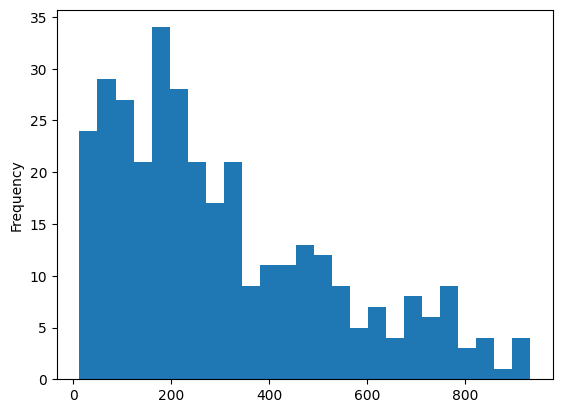

In [50]:
df3[df3['City'].isin(['Yangon'])].groupby('City')['Total Payment'].plot(kind='hist',bins=25)

Kota Naypyitaw

City
Naypyitaw    Axes(0.125,0.11;0.775x0.77)
Name: Total Payment, dtype: object

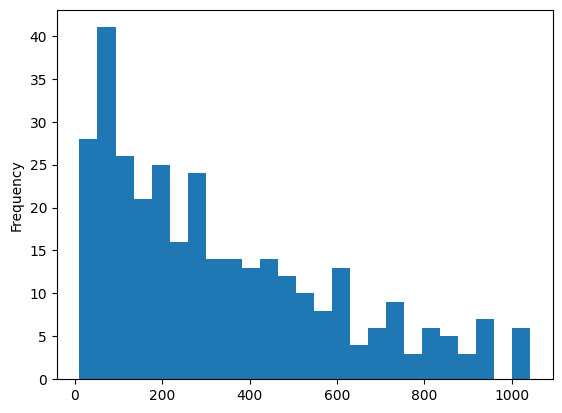

In [51]:
df3[df3['City'].isin(['Naypyitaw'])].groupby('City')['Total Payment'].plot(kind='hist',bins=25)

Kota Mandalay

City
Mandalay    Axes(0.125,0.11;0.775x0.77)
Name: Total Payment, dtype: object

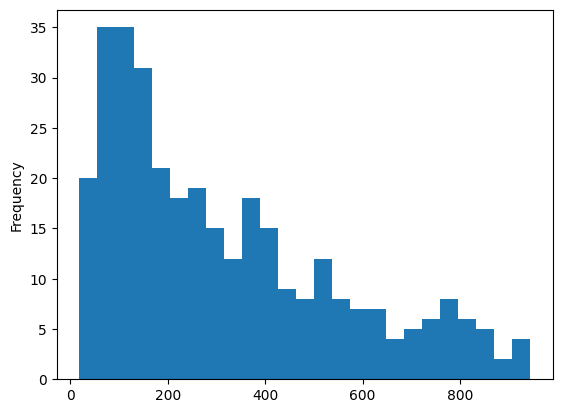

In [52]:
df3[df3['City'].isin(['Mandalay'])].groupby('City')['Total Payment'].plot(kind='hist',bins=25)

### Summary

##### Recap

**Matriks Dasar**

**Sebelum outlier take out**

Rerata Total Payment:
Mandalay     319.872506
Naypyitaw    337.099715
Yangon       312.354031

Median Total Payment:
Mandalay     252.88200
Naypyitaw    271.41975
Yangon       240.82800

Modus Total Payment:
Mandalay     263.970
Naypyitaw    829.080
Yangon       216.846

**Sesudah outlier take out**

Rerata Total Payment:
Mandalay     315.614536
Naypyitaw    337.099715
Yangon       308.311407

Median Total Payment:
Mandalay     252.23625
Naypyitaw    271.41975
Yangon       237.15300

Modus Total Payment:
Mandalay     263.970
Naypyitaw    829.080
Yangon       216.846 


**Variabilitas Data**

**Sebelum outlier take out**

Range Total Payment:
Mandalay     1003.8525
Naypyitaw    1031.9715
Yangon       1026.5955

Std Dev Total Payment:
Mandalay     242.447565
Naypyitaw    263.160870
Yangon       231.640025

**Sesudah outlier take out**

Range Total Payment:
Mandalay     1003.8525
Naypyitaw    1031.9715
Yangon       1026.5955

Std Dev Total Payment:
Mandalay     242.447565
Naypyitaw    263.160870
Yangon       231.640025

**Persebaran Data**

**Sebelum outlier take out**

Skewness Total Payment:
Mandalay     0.888505
Naypyitaw    0.855874
Yangon       0.905500

Kurtosis Total Payment:
Mandalay    -0.158076
Naypyitaw   -0.177354
Yangon      -0.003526

**Sesudah outlier take out**

Skewness Total Payment:
Mandalay     0.888505
Naypyitaw    0.855874
Yangon       0.905500

Kurtosis Total Payment:
Mandalay    -0.158076
Naypyitaw   -0.177354
Yangon      -0.003526

##### Insight

- Persebaran data nilai skewnness dan kurtosis sebelum dan sesudah outlier take out tidak berubah karena outlier yang di-take-out hanya 4 baris atau 0,4% dari total data yang ada, selain itu ditunjukan oleh nilai skewness yang tidak terlalu tinggi (Mandalay: 0.888505, Naypyitaw: 0.855874,Yangon: 0.905500) dan termasuk dalam moderately skewed. Keruncingannya pun tidak terlalu besar ditunjukan oleh nilai kurtosis yang lumayan kecil (Mandalay: -0.158076, Naypyitaw: -0.177354, Yangon: -0.003526) mengindikasikan potensi outlier kecil juga, terbukti dengan hanya adanya 4 outlier.

- Rerata Total Payment

SEBELUM OUTLIER TAKE OUT    ;    SESUDAH OUTLIER TAKE OUT

Mandalay     319.872506    ;     Mandalay     315.614536

Naypyitaw    337.099715    ;    Naypyitaw    337.099715

Yangon       308.311407    ;     Yangon       312.354031

- Median Total Payment

SEBELUM OUTLIER TAKE OUT   ;    SESUDAH OUTLIER TAKE OUT

Mandalay     252.88200     ;     Mandalay     252.23625

Naypyitaw    271.41975     ;     Naypyitaw    271.41975

Yangon       237.15300     ;     Yangon       240.82800

          
- Modus Total Payment

SEBELUM OUTLIER TAKE OUT   ;    SESUDAH OUTLIER TAKE OUT

Mandalay     263.970      ;      Mandalay     263.970

Naypyitaw    829.080      ;      Naypyitaw    829.080

Yangon       216.846      ;      Yangon       216.846

- Dapat diperhatikan bahwa tidak banyak nilai yang berubah karena sedikit outlier yang keluar, nilai-nilai yang berubah ada pada Rerata Mandalay dan Yangon & Median Yangon saja.

- Baik sebelum maupun sesudah outlier-take-out, nilai tertinggi ketiga kota tersebut dipegang oleh Kota Naypyitaw, hal ini dipengaruhi oleh adanya modus yang jauh lebih tinggi dari modus kota lain.

### Conclusion of (1/7)

Kota atau Cabang yang memeroleh nilai pendapatan tertinggi ada pada Supercenter Kota Naypyitaw

## (2/7) Analisa demografi belanja di Supercenter berdarkan jenis kelamin (Inferential Statistic)

### Analisa Deskriptif

In [53]:
df3.groupby('Gender')['Total Payment'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,498.0,331.096837,244.653627,12.6945,132.13200,270.42225,485.021250,1042.65
Male,498.0,309.326373,240.046654,10.6785,117.88875,242.60250,455.996625,1023.75


Secara kasar saja, sudah terlihat kalau belanja sub-kategori Gender 'Female' lebih tinggi dari sub-kategori Gender 'Male'

### Hypothesis Testing

Karena outlier sudah dikeluarkan, maka bisa langsung masuk ke analisa Pengetesan Hipotesis

Hypothesis testing menggunakan Two Sided Two Samples Test karena melibatkan dua kelompok data dan menganalisa nilainya berbeda signifikan atau tidak

**H0: Tidak ada perbedaan signifikan total belanja antara Laki-laki dengan Perempuan**

**H1: Ada perbedaan signifikan total belanja antara Laki-laki dengan Perempuan**

In [63]:
from scipy import stats

#Mengonversi kolom 'Gender' ke numerik
df3['Gender Numeric'] = df3['Gender'].map({'Male': 1, 'Female': 0})

#Menghitung korelasi Spearman & P-Value
corr_rho, pval_s = stats.spearmanr(df3['Total Payment'], df3['Gender Numeric'])
print(f"rho-correlation: {corr_rho:.2f}")
print(f"p-value: {pval_s:.4f}")


rho-correlation: -0.05
p-value: 0.1229


#### Insight

Korelasi: -0,05

P-Value: 0,1229 atau 12,29%

Karena P-Value (12,29%) > Confidence Level (5%), maka H0 GAGAL DITOLAK

#### Visualisasi Korelasi

c:\Users\omen\miniconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


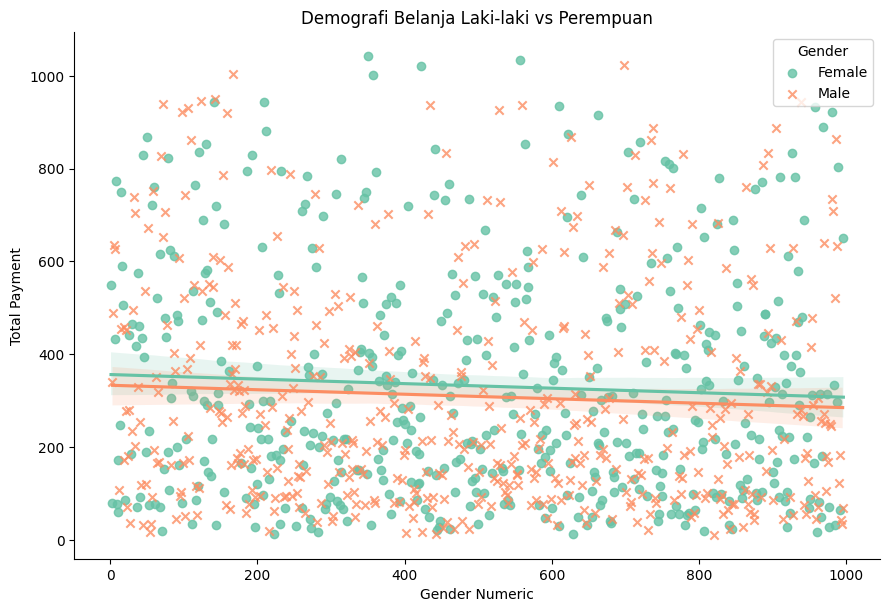

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

df3['Gender Numeric'] = range(1, len(df3) + 1)

sns.lmplot(data=df3, x='Gender Numeric', y='Total Payment', hue='Gender', markers=["o", "x"], palette="Set2", height=6, aspect=1.5, legend=False)

plt.title('Demografi Belanja Laki-laki vs Perempuan')
plt.legend(title='Gender')

plt.show()

#### Conclusion of (2/7)

- Korelasi antara total belanja Laki-laki dan Perempuan memiliki nilai korelasi negatif yang sangat rendah (-0,05) yang berarti ketika salah satu variabel nilainya naik, ada kemungkinan sangat kecil variabel lainnya nilainya akan turun, sangat kecil keungkinan.

- H0 gagal ditolak menunjukan bahwa tidak adanya perbedaan signifikan total belanja antara Laki-laki dan Perempuan, walaupun pada analisa deskriptif di awal nilai total belanja Perempuan lebih tinggi dibanding Laki-laki

## (3/7) Analisa jenis pembayaran paling efisien (Inferential Statistic)

### Analisa Deskriptif

In [74]:
df3.groupby('Payment Type')['Total Payment'].describe()

,count,mean,std,min,25%,50%,75%,max
Payment Type,,,,,,,,
Cash,344.0,326.181890,242.660640,10.6785,132.712125,262.9620,473.515875,1003.59
Credit card,309.0,319.434942,251.529700,12.6945,118.062000,235.8720,470.988000,1042.65
Ewallet,343.0,314.923592,234.451381,13.4190,122.167500,247.8735,463.485750,1034.46


Dari analisa deskriptif ini saja, bisa dilihat bahwa total belanja menggunakan Credit Card berada sekitar $40 dibawah tipe pembayran yang lain.

### Hypothesis Testing

Hypothesis testing menggunakan ANOVA Test karena melibatkan lebih dari dua kelompok data

**H0: Tidak ada perbedaan signifikan total belanja diantara tiga tipe pembayaran**

**H1: Ada perbedaan signifikan total belanja diantara tiga tipe pembayaran**

In [75]:
#Mengelompokkan jenis pembayaran menjadi sebuah variabel yang akan dipanggil untuk mencari nilai P-Value
Cash = df3['Total Payment'][(df3['Payment Type']=='Cash')]
Credit_Card = df3['Total Payment'][df3['Payment Type']=='Credit card']
E_Wallet = df3['Total Payment'][df3['Payment Type']=='Ewallet']

res = stats.f_oneway(Cash, Credit_Card, E_Wallet)
print(f"P-value: {res.pvalue:.4f}")

P-value: 0.8294


#### Insight

P-Value: 0,8294 atau 82,94%

Karena P-Value (82,94%) > Confidence Level (5%), maka H0 GAGAL DITOLAK

#### Conclusion of (3/7)

H0 gagal ditolak dan H1 berhasil diterima menunjukan bahwa tidak adanya perbedaan signifikan total belanja diantara tiga tipe pembayaran (Cash, Credit Card, & E-Wallet), walaupun pada analisa deskriptif di awal nilai total belanja Credit Card berada sekitar $40 dibawah tipe pembayaran yang lain.

## (4/7) Analisa waktu paling ramai berbelanja di Supercenter

### Kategorisasi waktu dan menunjukan jumlahnya

In [76]:
#Membuat variabel dataframe baru 'df4' dari salinan 'df3'
df4 = df3.copy()

def time_categorized(time_str):
    #Mengibah tipe string waktu menjadi objek datetime.time
    time_obj = pd.to_datetime(time_str, format='%H:%M').time()
    
    if time_obj >= pd.Timestamp('06:00:00').time() and time_obj <= pd.Timestamp('09:59:59').time():
        return 'Pagi'
    elif time_obj >= pd.Timestamp('10:00:00').time() and time_obj <= pd.Timestamp('13:59:59').time():
        return 'Siang'
    elif time_obj >= pd.Timestamp('14:00:00').time() and time_obj <= pd.Timestamp('17:59:59').time():
        return 'Sore'
    else:
        return 'Malam'

#Menerapkan fungsi ke kolom 'Time' untuk mendapatkan kolom 'Time Categorized'
df4['Time Categorized'] = df4['Time'].apply(time_categorized)

#Menghitung frekuensi setiap kategori
time_categorized_freq = df4['Time Categorized'].value_counts()

#Menampilkan frekuensinya
time_categorized_freq


Time Categorized
Siang    381
Sore     334
Malam    281
Name: count, dtype: int64

Dapat dilihat bahwa jumlah transaksi tertinggi ada pada kategori waktu siang hari.

### Menampilkan chart hasil kategorisasi waktu

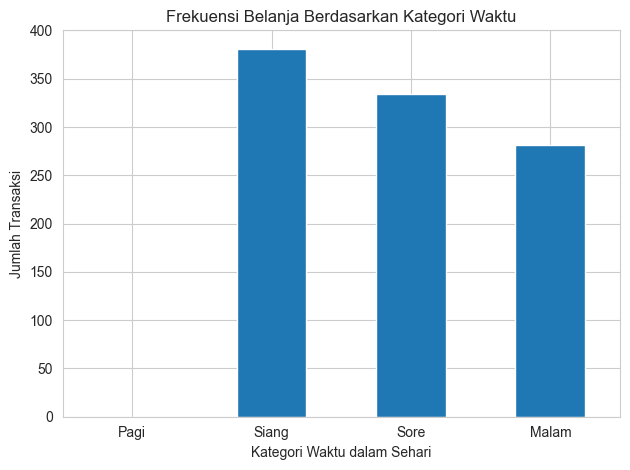

In [77]:
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

#Data dari hasil kategorisasi di atas
time_categorized_freq2 = df4['Time Categorized'].value_counts()

#Mengatur urutan kategori yang ditampilkan dalam chart
categories_order = ['Pagi', 'Siang', 'Sore', 'Malam']
time_categorized_freq2 = time_categorized_freq2.reindex(categories_order, fill_value=0)

time_categorized_freq2.plot(kind='bar')

#Judul dan label untuk chart
plt.title('Frekuensi Belanja Berdasarkan Kategori Waktu')
plt.xlabel('Kategori Waktu dalam Sehari')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=0)

#Menampilkan chart
plt.tight_layout()
plt.show()


Bisa dilihat bahwa waktu yang paling banyak orang berbelanja ada pada kategori waktu siang hari

### Conclusion of (4/7)

## (5/7) Analisa popularitas berbagai lini produk

### Unique value dalam kolom 'Product Line'

In [78]:
df4['Product Line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

### Popularitas berdasarkan jumlah transaksi

#### Jumlah transaksi setiap lini produk

Popularitas disini menggunakan matriks Lini Produk dibandingkan dengan frekuensi penjualannya karena semakin populer produk maka semakin banyak terjual

In [79]:
line_popularity = df4['Product Line'].value_counts()
line_popularity

Product Line
Fashion accessories       177
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        157
Health and beauty         152
Name: count, dtype: int64

Dapat dilihat bahwa lini produk yang terjual paling banyak adalah 'Fashion accessories' walaupun nilai satu sama lain tidak berbeda jauh.

#### Menapilkan chart popularitas lini produk

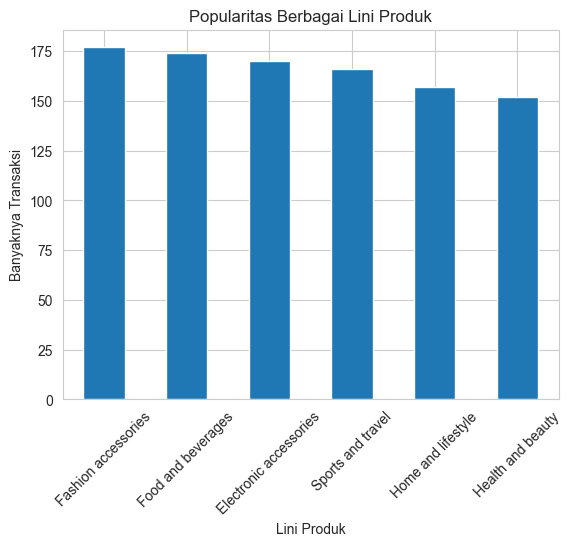

In [80]:
import seaborn as sns

sns.set_style("whitegrid")

line_popularity.plot(kind='bar')
plt.title('Popularitas Berbagai Lini Produk')
plt.ylabel('Banyaknya Transaksi')
plt.xlabel('Lini Produk')
plt.xticks(rotation=45) #Memiringkan label bar 45 derajat agar lebih rapih
plt.show()

### Popularitas berdasarkan rerata rating

Product Line
Food and beverages        7.113218
Fashion accessories       7.019774
Health and beauty         7.003289
Electronic accessories    6.924706
Sports and travel         6.916265
Home and lifestyle        6.862420
Name: Rating, dtype: float64


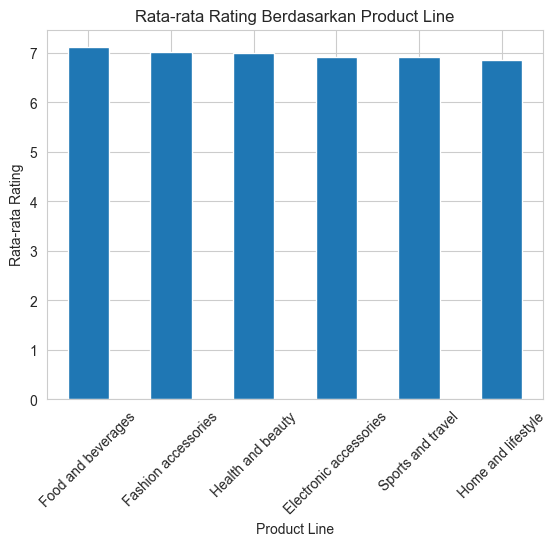

In [81]:
#Menghitung rata-rata rating untuk setiap 'Product Line'
avg_rating = df4.groupby('Product Line')['Rating'].mean()

sns.set_style("whitegrid")

print(avg_rating.sort_values(ascending=False))

avg_rating.sort_values(ascending=False).plot(kind='bar')
plt.title('Rata-rata Rating Berdasarkan Product Line')
plt.ylabel('Rata-rata Rating')
plt.xticks(rotation=45)
plt.show()

### Conclusion of (5/7)

- Bisa dilihat bahwa lini produk dengan jumlah transaksi paling banyak adalah 'Fashion Accessories', walaupun nilainya tidak berdeda jauh dengan Lini-lini Produk lainnya.

- Berdasarkan nilai rerata rating, lini produk paling populer adalah 'Food and Beverages' dan perbedaan nilainya tidak berbeda jauh dengan Lini-lini Produk lainnya.

## (6/7) Analisa perilaku belanja 'Member' & 'Non-Member'

### Matriks analisa perilaku belanja

Untuk menganalisa 'perilaku' belanja Member dan Non-Member diperlukan 3 matriks yaitu 'Rerata Pengeluaran', 'Metode Pembayaran', & 'Lini produk yang dibeli' baik oleh Member ataupun Non-Member

In [82]:
#Mempersiapkna variabel matriks yang digunakan
avg_spend = df4.groupby('Customer Type')['Total Payment'].mean()
payment_method = df4.groupby('Customer Type')['Payment Type'].value_counts()
line_prod_distr = df4.groupby('Customer Type')['Product Line'].value_counts()

print('Rerata Pengeluaran:', avg_spend, '\n')
print('Metode Pembayaran:', payment_method, '\n')
print('Lini produk yang dibeli:', line_prod_distr, '\n')

Rerata Pengeluaran: Customer Type
Member    326.543238
Normal    313.828911
Name: Total Payment, dtype: float64 

Metode Pembayaran: Customer Type  Payment Type
Member         Credit card     172
               Cash            168
               Ewallet         160
Normal         Ewallet         183
               Cash            176
               Credit card     137
Name: count, dtype: int64 

Lini produk yang dibeli: Customer Type  Product Line          
Member         Food and beverages        94
               Sports and travel         87
               Fashion accessories       86
               Home and lifestyle        82
               Electronic accessories    78
               Health and beauty         73
Normal         Electronic accessories    92
               Fashion accessories       91
               Food and beverages        80
               Health and beauty         79
               Sports and travel         79
               Home and lifestyle        75
Name: coun

### Menampilkan chart perilaku belanja 'Member' dan 'Non-Member'

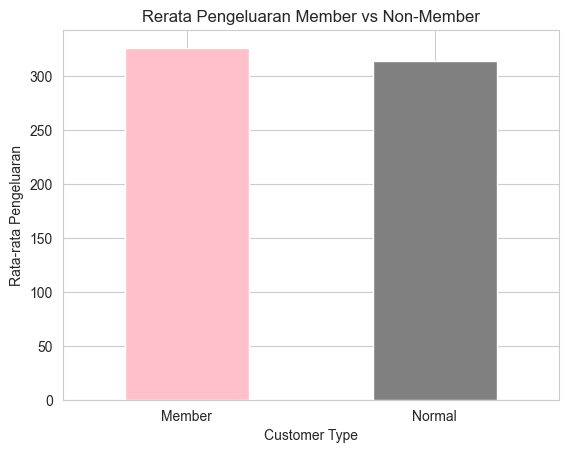

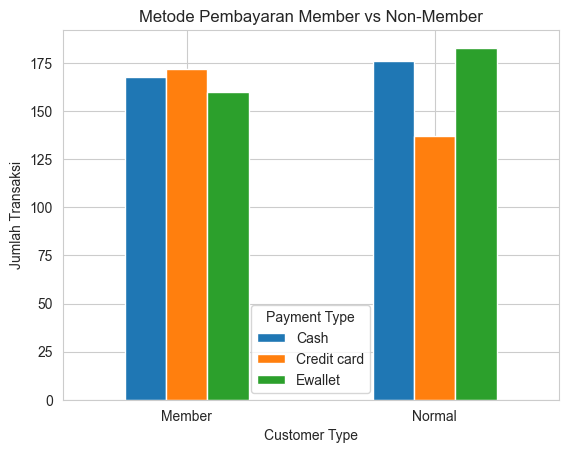

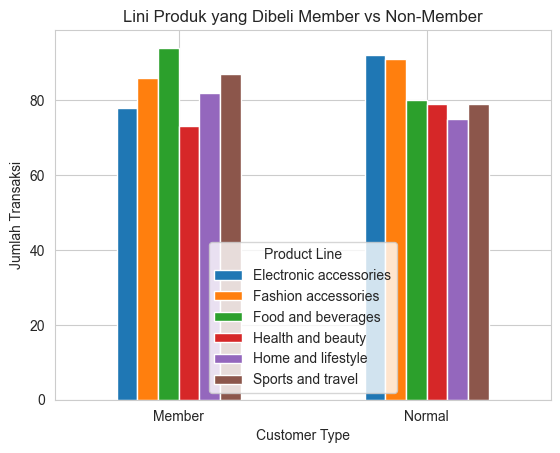

In [83]:
import seaborn as sns

#Rerata Pengeluaran
avg_spend.plot(kind='bar', color=['pink', 'grey'])
plt.title('Rerata Pengeluaran Member vs Non-Member')
plt.ylabel('Rata-rata Pengeluaran')
plt.xticks(rotation=0)
plt.show()

#Metode Pembayaran
payment_pivot = payment_method.unstack().fillna(0)
payment_pivot.plot(kind='bar', stacked=False)
plt.title('Metode Pembayaran Member vs Non-Member')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=0)
plt.show()

#Lini Produk yang Dibeli
product_pivot = line_prod_distr.unstack().fillna(0)
product_pivot.plot(kind='bar')
plt.title('Lini Produk yang Dibeli Member vs Non-Member')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=0)
plt.show()

### Conclusion of (6/7)

Dari ketiga matriks analisa yang digunakan, dapat ditarik kesimpulan bahwa perilaku:

1. Rerata Pengeluaran Member lebih tinggi dari Non-Member

2. Member lebih banyak menggunakan metode pembayaran Credit Card, disusul Cash & E-Wallet, sementara Non-Member meengunakan E-Wallet, disusul Cash & Credit Card atau kebalikan urutan preferensi Member

3. Member paling banyak belanja lini produk 'Food & Beverages' dan paling sedikit belanja 'Health & Beauty', sementara Non-Member paling banyak belanja 'Electronic Accessories' dan paling sedikit belanja 'Home & Lifestyle'

## (7/7) Analisa tren penjualan di berbagai cabang/kota

### Mengubah tipe kolom 'Date' menjadi datetime

Karena lupa tidak diubah pada saat Data Cleaning

In [84]:
# Ubah kolom 'Date' menjadi tipe datetime
df4['Date'] = pd.to_datetime(df4['Date'])

### Menampilkan chart tren penjualan di berbagai kota

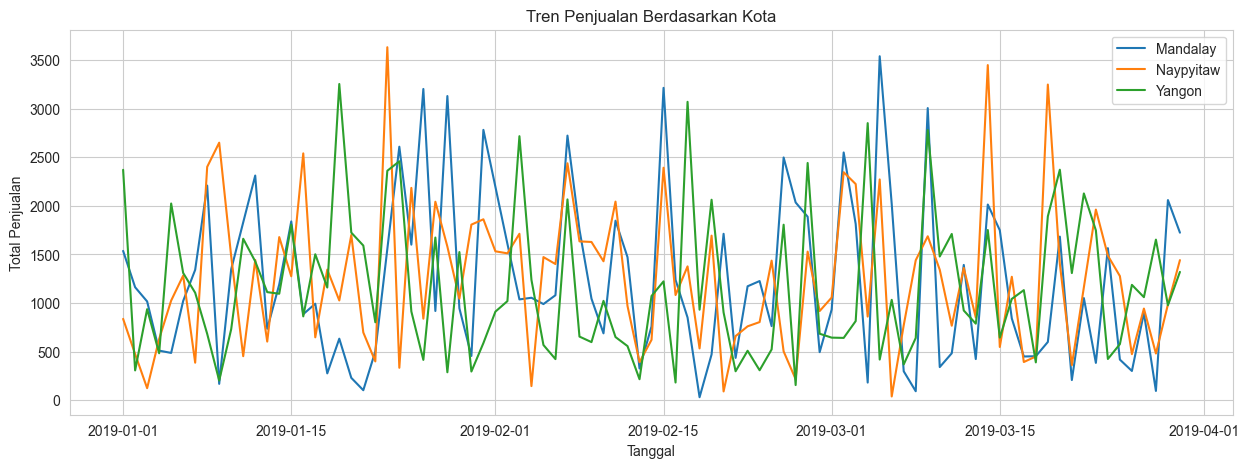

In [85]:
#Pengelompokan data berdasarkan 'City' dan 'Date', lalu menghitung total penjualan pada setiap tanggal
sales_trend = df4.groupby(['City', 'Date'])['Total Payment'].sum().reset_index()

#Membuat plot chart dengan ukuran yang panjang agar lebih enak dilihat
plt.figure(figsize=(15, 5))

#Membuat garis plot chart untuk setiap kota
cities = ['Mandalay', 'Naypyitaw', 'Yangon']
for city in cities:
    city_data = sales_trend[sales_trend['City'] == city]
    plt.plot(city_data['Date'], city_data['Total Payment'], label=city)

plt.title('Tren Penjualan Berdasarkan Kota')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan')
plt.legend()
plt.show()


**Karena masih terlihat rumit dan berkebalikan dengan tujuan visualisasi yang memudahkan kita membaca data, maka akan saya plot datanya berdasarkan jumlah penjualan tiap minggu**

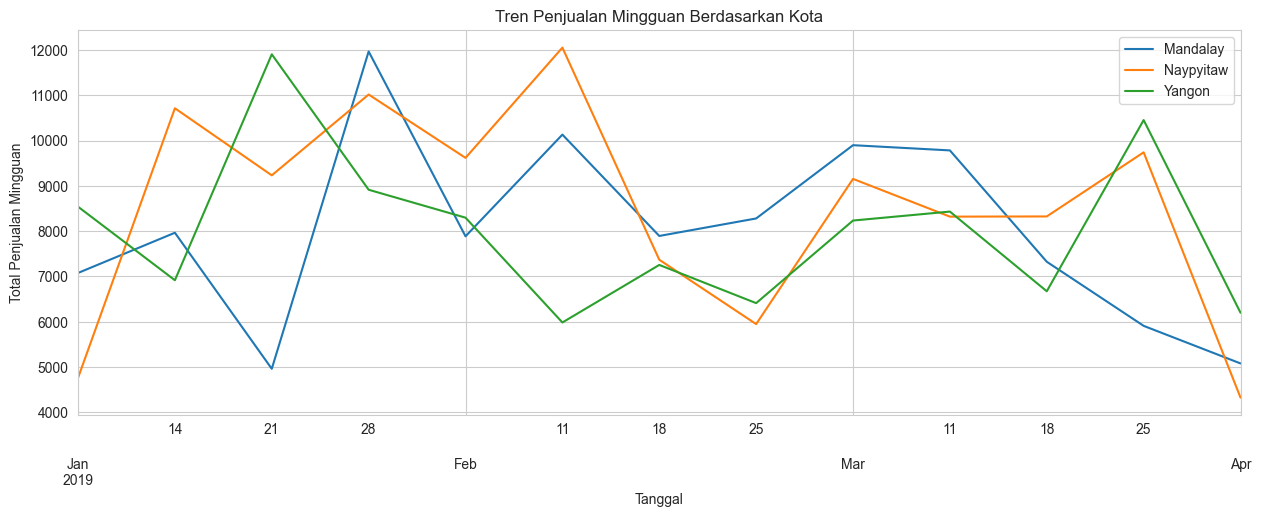

In [86]:
#Mengelompokkan data berdasarkan 'City' dan 'Date'
sales_data = df4.groupby(['City', 'Date'])['Total Payment'].sum()

#Resample data menjadi total mingguan
weekly_sales = sales_data.groupby(level=0).resample('W-MON', level=1).sum()

plt.figure(figsize=(15, 5))

cities = ['Mandalay', 'Naypyitaw', 'Yangon']
for city in cities:
    weekly_sales[city].plot(label=city)

plt.title('Tren Penjualan Mingguan Berdasarkan Kota')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan Mingguan')
plt.legend()
plt.show()

### Insight

Dapat dilihat dari plot yang terpampang bahwa:

1. **Mandalay**

Min: Minggu ke-3 Januari

Max: Minggu ke-4 Januari

2. **Naypyitaw**

Min: Minggu ke-4 Maret

Max: Minggu ke-2 Februari

3. **Yangon**

Min: Minggu ke-2 Februari

Max: Minggu ke-3 Januari

### Conclusion of (7/7)

Walaupun kurang bisa menarik kesimpulan dari hasil insight, bisa diperhatikan dari plotnya bahwa pada ketiga kota banyak nilai penjualan yang tinggi pada minggu ke-3 Januari sampai minggu ke-2 Februari dan semua turun pada minggu ke-4 Maret.

# PENGAMBILAN KESIMPULAN

## Recap

1. **Cabang dengan pendapatan tertinggi**

- Kota atau Cabang yang memeroleh nilai pendapatan tertinggi ada pada Supercenter Kota Naypyitaw

2. **Demografi belanja antara laki-laki dan perempuan**

- Korelasi antara total belanja Laki-laki dan Perempuan memiliki nilai korelasi negatif yang sangat rendah (-0,05) yang berarti ketika salah satu variabel nilainya naik, ada kemungkinan sangat kecil variabel lainnya nilainya akan turun, sangat kecil keungkinan.

- H0 gagal ditolak menunjukan bahwa tidak adanya perbedaan signifikan total belanja antara Laki-laki dan Perempuan, walaupun pada analisa deskriptif di awal nilai total belanja Perempuan lebih tinggi dibanding Laki-laki

3. **Jenis pembayaran paling efisien**

- H0 gagal ditolak menunjukan bahwa tidak adanya perbedaan signifikan total belanja diantara tiga tipe pembayaran (Cash, Credit Card, & E-Wallet), walaupun pada analisa deskriptif di awal nilai total belanja Credit Card berada sekitar $40 dibawah tipe pembayaran yang lain.

4. **Waktu paling ramai berbelanja**

- Bisa dilihat bahwa waktu yang paling banyak orang berbelanja ada pada kategori waktu siang hari

5. **Popularitas lini produk**

- Bisa dilihat bahwa lini produk dengan jumlah transaksi paling banyak adalah 'Fashion Accessories', walaupun nilainya tidak berdeda jauh dengan Lini-lini Produk lainnya.

- Berdasarkan nilai rerata rating, lini produk paling populer adalah 'Food and Beverages' dan perbedaan nilainya tidak berbeda jauh dengan Lini-lini Produk lainnya.

6. **Perilaku belanja Member dengan Non-Member**

- Rerata Pengeluaran Member lebih tinggi dari Non-Member

- Member lebih banyak menggunakan metode pembayaran Credit Card, disusul Cash & E-Wallet, sementara Non-Member meengunakan E-Wallet, disusul Cash & Credit Card atau kebalikan urutan preferensi Member

- Member paling banyak belanja lini produk 'Food & Beverages' dan paling sedikit belanja 'Health & Beauty', sementara Non-Member paling banyak belanja 'Electronic Accessories' dan paling sedikit belanja 'Home & Lifestyle'

7. **Tren penjualan di berbagai cabang Supercenter**

- Walaupun kurang bisa menarik kesimpulan dari hasil insight, bisa diperhatikan dari plotnya bahwa pada ketiga kota banyak nilai penjualan yang tinggi pada minggu ke-3 Januari sampai minggu ke-2 Februari dan semua turun pada minggu ke-4 Maret.

## Insight

1. Cabang Supercenter dengan pendaptan tertinggi ada pada Naypyitaw
2. Tidak ada perbedaan signifikan antara total belanja laki-laki dan perempuan
3. Tidak ada perbedaam signifikan diantara tiga jenis pembayaran yang dilakukan
4. Waktu paling ramai berbelanja terjadi pada siang hari
5. Lini produk paling populer menurut jumlah transaksi adalah 'Fashion Accessories'
6. Lini produk paling populer menurut nilai rerata rating adalah 'Food & Beverages'
7. Rerata pengeluaran 'Member' lebih tinggi dari 'Non-Member'
8. Member lebih banyak menggunakan 'Credit Card'
9. Non-Member lebih banyak menggunakan E-Wallet
10. Member paling banyak belanja lini 'Food & Beverages' dan Non-Member paling banyak belanja lini 'Electronic Accesories'
11. Terjadi kenaikan penjualan pada periode minggu ke-3 Januari s.d. minggu ke-2 Februari dan penurunan pada minggu ke-Maret

## Conclusion & Decision-making

Dari perumusan masalah sampai dengan insight kesimpulan yang ada, dapat diambil beberapa keputusan untuk meningkatkan penjualan Supercenter, yaitu:

1. Melakukan studi banding ke cabang/kota Naypyitaw untuk mempelajari teknik market cabang mereka.

2. Melakukan promo "Happy Hour" pada siang hari agar bisa menarik minat banyak orang untuk bisa menarik lebih banyak pengunjung.

3. Meningkatkan stok penjualan lini produk 'Fashion Accessories', 'Food & Beverages', & 'Electronic Accessories'

4. Bekerjasama dengan pihak 'Credit Card' dan pihak 'E-Wallet' agar 'Member' bisa menggunakan lebih mudah dan banyak promo berbelanja di Supercenter sekaligus menarik minat calon member-member baru

5. Menginsvestigasi rencana marketing yang terjadi pada Januari dan Februari 2019 untuk memahami naiknya penjualan dan juga Maret 2019 untuk memahami turunnya penjualan agar informasinya bisa digunakan untuk membuat keputusan marketing.

In [ ]:
#Menyimpan Dataframe menjadi file .csv untuk input Tableau

df4.to_csv('Yosef_Supercenter_Dataset.csv', index=False)